In [1]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

%matplotlib inline

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples = 1000, n_features = 2, n_informative = 2, n_targets = 1,
                                             noise = 5, coef = True, random_state = 2)

In [3]:
# отмасштабируем получившиеся признаки методом стандартизации
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range (data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [4]:
# функция, для определения средневкадратичной ошибки
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2))/X.shape[0]

In [5]:
# градиентный спуск
def eval_gd_model(X, y, iterations, alpha=1e-2):
    W_gd = np.random.randn(X.shape[1])
    n_gd = X.shape[0]
    w_list_gd = [W_gd.copy()]
    errors_gd = []
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W_gd)
        err = mserror(X, W_gd, y)
        W_gd -= alpha * (1/n_gd * 2 * np.dot(X.T, (y_pred - y)))
        #if i % (iterations / 100) == 0:
        #    print(i, W_gd, err)
        w_list_gd.append(W_gd.copy())
        errors_gd.append(err)
    W_gd = np.array(W_gd)
    w_list_gd = np.array(w_list_gd)
    errors_gd = np.array(errors_gd)
    return W_gd, errors_gd[-1], w_list_gd, errors_gd

In [6]:
# стохастический градиентный спуск
def eval_sgd_model(X, y, iterations, alpha=1e-2):
    W_sgd = np.random.randn(X.shape[1])
    w_list_sgd = [W_sgd.copy()]
    errors_sgd = []
    for i in range(1, iterations+1):
        train_ind = np.random.randint(X.shape[0])
        n_sgd = X[train_ind].shape[0]
        y_pred_tmp = np.dot(W_sgd, X[train_ind])
        err = mserror(X, W_sgd, y)
        W_sgd -= alpha * (1/n_sgd * 2 * np.dot((y_pred_tmp - y[train_ind]), X[train_ind]))
        #if i % (iterations / 1000) == 0:
        #    print(i, W_sgd, err)
        w_list_sgd.append(W_sgd.copy())
        errors_sgd.append(err)
    w_list_sgd = np.array(w_list_sgd)
    errors_sgd = np.array(errors_sgd)
    return W_sgd, w_list_sgd, errors_sgd

In [7]:
eval_gd_model(data, target, iterations = 10000, alpha = 1e-2)

(array([61.43607084, 67.66544978]),
 38.56825174585216,
 array([[ 1.28773551, -1.19281096],
        [ 2.45743241,  0.15529276],
        [ 3.60438672,  1.47699956],
        ...,
        [61.43607084, 67.66544978],
        [61.43607084, 67.66544978],
        [61.43607084, 67.66544978]]),
 array([8197.73817912, 7882.29011816, 7579.03798051, ...,   38.56825175,
          38.56825175,   38.56825175]))

In [8]:
eval_sgd_model(data, target, iterations = 10000, alpha = 1e-2)

(array([61.33930822, 67.04346083]),
 array([[-1.21890232e-01, -6.36293437e-02],
        [-5.70222359e-02,  1.33491935e-01],
        [-6.26406174e-02,  1.39875013e-01],
        ...,
        [ 6.13667502e+01,  6.70286892e+01],
        [ 6.13551800e+01,  6.70393638e+01],
        [ 6.13393082e+01,  6.70434608e+01]]),
 array([8213.73527209, 8179.88831537, 8179.71788191, ...,   38.96920346,
          38.97638837,   38.96433175]))

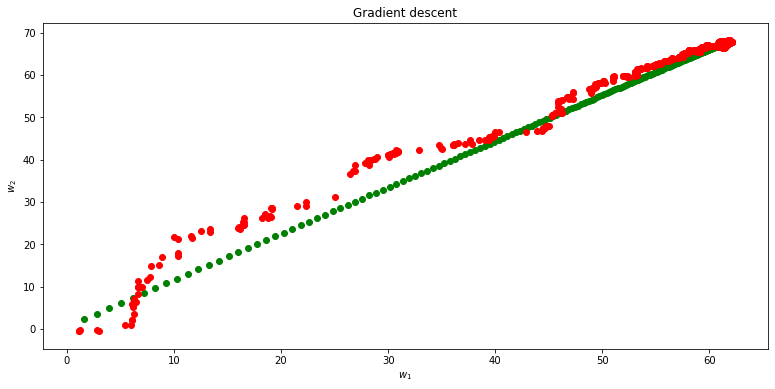

In [9]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(eval_gd_model(data, target, iterations = 1000, alpha = 1e-2)[2][:, 0],
            eval_gd_model(data, target, iterations = 1000, alpha = 1e-2)[2][:, 1], c='g')
plt.scatter(eval_sgd_model(data, target, iterations = 1000, alpha = 1e-2)[1][:, 0], 
            eval_sgd_model(data, target, iterations = 1000, alpha = 1e-2)[1][:, 1], c='r')

plt.show()

Text(0, 0.5, 'MSE')

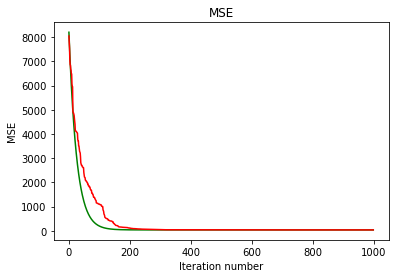

In [10]:
plt.plot(range(len(eval_gd_model(data, target, iterations = 1000, alpha = 1e-2)[3])),
         eval_gd_model(data, target, iterations = 1000, alpha = 1e-2)[3], c='g')
plt.plot(range(len(eval_sgd_model(data, target, iterations = 1000, alpha = 1e-2)[2])), 
         eval_sgd_model(data, target, iterations = 1000, alpha = 1e-2)[2], c='r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Несмотря на то, что стохастический градиентный спуск сходится медленней обычного, за счет большого увеличения числа итераций получается улучшить скорость сходимости на единицу времени. Из графика видно, что уменьшение ошибки при стохастическом градиентном спуске происходит ступенчато, так как причиной служит вероятность увеличения ошибки на другом объекте на каждой итерации.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

In [11]:
def eval_gd_model_reg2(X, y, iterations, alpha=1e-2, lambda_=1e-8):
    W_gd = np.random.randn(X.shape[1])
    n_gd = X.shape[0]
    w_list_gd = [W_gd.copy()]
    errors_gd = []
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W_gd)
        err = mserror(X, W_gd, y)
        W_gd -= alpha * (1/n_gd * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * W_gd)
        #if i % (iterations / 100) == 0:
        #    print(i, W_gd, err)
        w_list_gd.append(W_gd.copy())
        errors_gd.append(err)
    w_list_gd = np.array(w_list_gd)
    return W_gd, errors_gd[-1], w_list_gd

In [12]:
eval_gd_model(data, target, iterations = 200, alpha = 1e-2)[0:2]

(array([60.2053965 , 66.34676042]), 41.87100972895085)

In [13]:
eval_gd_model_reg2(data, target, iterations = 200, alpha = 1e-2, lambda_=1e-2)

(array([59.95503476, 66.05807122]),
 43.378338772268776,
 array([[ 0.30471318,  0.35048553],
        [ 1.49478572,  1.66721332],
        [ 2.66157399,  2.95804987],
        [ 3.8055335 ,  4.22350436],
        [ 4.92711085,  5.46407593],
        [ 6.02674389,  6.68025392],
        [ 7.10486192,  7.87251804],
        [ 8.16188584,  9.04133855],
        [ 9.1982283 , 10.18717649],
        [10.21429391, 11.31048381],
        [11.21047935, 12.41170357],
        [12.18717353, 13.49127014],
        [13.14475776, 14.54960933],
        [14.0836059 , 15.58713857],
        [15.00408448, 16.60426709],
        [15.90655289, 17.60139606],
        [16.79136346, 18.57891878],
        [17.65886164, 19.53722081],
        [18.50938613, 20.47668011],
        [19.34326898, 21.39766722],
        [20.16083578, 22.30054539],
        [20.96240572, 23.18567072],
        [21.74829176, 24.05339233],
        [22.51880075, 24.90405245],
        [23.27423352, 25.73798658],
        [24.01488501, 26.55552363],
       

L2-регуляризация позволяет "упростить" модель обучения при значительных значениях lambda, тем самым уменьшить зависимость модели от весов. Но в то же время, в итоге ошибка MSE увеличивается.

3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [14]:
def eval_gd_model_reg1(X, y, iterations, alpha=1e-2, lambda_=1e-2):
    W_gd = np.random.randn(X.shape[1])
    n_gd = X.shape[0]
    w_list_gd = [W_gd.copy()]
    errors_gd = []
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W_gd)
        err = mserror(X, W_gd, y)
        W_gd -= alpha * (1/n_gd * 2 * np.dot(X.T, (y_pred - y)) + lambda_ / 2 * (W_gd / np.abs(W_gd)))
        #if i % (iterations / 100) == 0:
        #    print(i, W_gd, err)
        w_list_gd.append(W_gd.copy())
        errors_gd.append(err)
    w_list_gd = np.array(w_list_gd)
    return W_gd, errors_gd[-1], w_list_gd

In [15]:
eval_gd_model_reg1(data, target, iterations = 200, alpha = 1e-2, lambda_=1e-2)

(array([60.22073872, 66.34531375]),
 41.836619203989564,
 array([[-0.4594048 , -0.80655016],
        [ 0.74547153,  0.53303419],
        [ 1.92679757,  1.84630901],
        [ 3.08513162,  3.1338891 ],
        [ 4.22092109,  4.39627726],
        [ 5.33460472,  5.63396643],
        [ 6.42661268,  6.8474399 ],
        [ 7.49736679,  8.03717152],
        [ 8.54728065,  9.20362586],
        [ 9.57675982, 10.3472584 ],
        [10.58620197, 11.46851569],
        [11.57599703, 12.56783556],
        [12.54652733, 13.64564726],
        [13.4981678 , 14.70237166],
        [14.43128602, 15.73842137],
        [15.34624246, 16.75420093],
        [16.24339056, 17.75010697],
        [17.12307688, 18.72652837],
        [17.98564125, 19.68384636],
        [18.83141687, 20.62243476],
        [19.66073047, 21.54266004],
        [20.47390242, 22.4448815 ],
        [21.27124685, 23.32945144],
        [22.05307179, 24.19671522],
        [22.81967925, 25.04701147],
        [23.5713654 , 25.8806722 ],
       

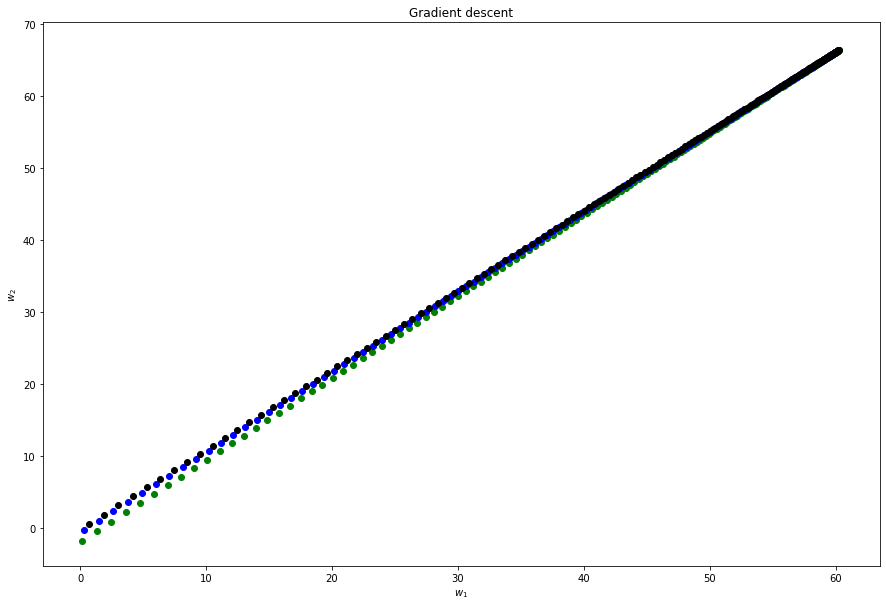

In [16]:
plt.figure(figsize=(15, 10))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(eval_gd_model(data, target, iterations = 200, alpha = 1e-2)[2][:, 0],
            eval_gd_model(data, target, iterations = 200, alpha = 1e-2)[2][:, 1], c='g')
plt.scatter(eval_gd_model_reg2(data, target, iterations = 200, alpha = 1e-2, lambda_=1e-2)[2][:, 0], 
            eval_gd_model_reg2(data, target, iterations = 200, alpha = 1e-2, lambda_=1e-2)[2][:, 1], c='b')
plt.scatter(eval_gd_model_reg1(data, target, iterations = 200, alpha = 1e-2, lambda_=1e-2)[2][:, 0], 
            eval_gd_model_reg1(data, target, iterations = 200, alpha = 1e-2, lambda_=1e-2)[2][:, 1], c='k')

plt.show()